# 告警风暴检测

In [ ]:
import pandas as pd
path="../data/demo_data/alert/alert_df.csv"
# 读取告警数据
alert_df=pd.read_csv(path)

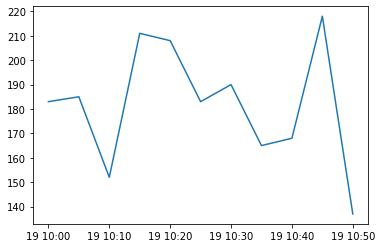

In [25]:
import matplotlib.pyplot as plt
alert_df["alert_time"]=pd.to_datetime(alert_df["timestamp"], unit='ms')
alert_df.index=alert_df["alert_time"]
alert_series=alert_df.resample("5T").count()["message"]
plt.plot(alert_series)
plt.show()

In [17]:
alert_series

alert_time
2019-03-19 10:00:00    183
2019-03-19 10:05:00    185
2019-03-19 10:10:00    152
2019-03-19 10:15:00    211
2019-03-19 10:20:00    208
2019-03-19 10:25:00    183
2019-03-19 10:30:00    190
2019-03-19 10:35:00    165
2019-03-19 10:40:00    168
2019-03-19 10:45:00    218
2019-03-19 10:50:00    137
Freq: 5T, Name: message, dtype: int64

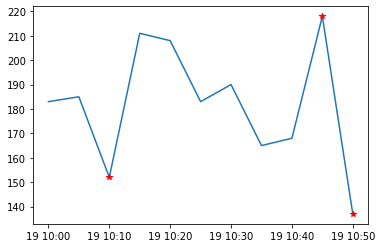

In [35]:
from sklearn.ensemble import IsolationForest
# 构造时间序列
x_train=np.array(alert_series).reshape(-1,1)
clf = IsolationForest(contamination=0.25)
clf.fit(x_train)
# 获得异常标记，-1为异常，1为正常
scores_pred = clf.predict(x_train)
# 将异常点标记在所作图上
res_df=pd.DataFrame(alert_series)
res_df["label"]=scores_pred
# 画正常的曲线
# 标记出异常点
plt.plot(res_df["message"])
plt.plot(res_df[res_df["label"]==-1]["message"],"r*")

In [36]:
res_df[res_df["label"]==-1]["message"]

alert_time
2019-03-19 10:10:00    152
2019-03-19 10:45:00    218
2019-03-19 10:50:00    137
Name: message, dtype: int64

# 生成告警摘要

In [49]:
# 拉取告警风暴内的告警
alert_storm=alert_df[(alert_df["alert_time"]>="2019-03-19 10:45:00")&(alert_df["alert_time"]<="2019-03-19 10:50:00")]


' time="2019-03-19T11:47:29+01:00" level=info msg="10.1.2.27 - global-app [19/Mar/2019:11:47:29 +0100] \\"GET /api/v1/units/status\\" 200 1452 \\"\\" \\"Go-http-client/1.1\\" (8ms)" clientIP=10.1.2.27 dataLength=1452 hostname=global-app latency=8 method=GET path=/api/v1/units/status referer= statusCode=200 userAgent=Go-http-client/1.1'

In [90]:
import jionlp as jio
import re
def clean_alert(text):
    text=jio.remove_email(text)
    text=jio.remove_url(text)
    text=jio.remove_ip_address(text)
    text=jio.remove_html_tag(text)
    text=jio.remove_parentheses(text)
    text=jio.remove_exception_char(text)
    text=re.sub("([0-9]+)-([0-9]+)-([0-9]+)T([0-9]+):([0-9]+):([0-9]+)\+([0-9]+):([0-9]+)", ' ', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text=re.sub('[0-9]+', ' ', text)
    return text
alert_storm["clean_message"]=alert_storm["message"].apply(clean_alert)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [99]:

# coding=utf-8  
""" 
Created on 2015-12-30 @author: Eastmount  
"""  
  
import time          
import re          
import os  
import sys
import codecs
import shutil
from sklearn import feature_extraction  
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer
 
'''
sklearn里面的TF-IDF主要用到了两个函数：CountVectorizer()和TfidfTransformer()。
    CountVectorizer是通过fit_transform函数将文本中的词语转换为词频矩阵。
    矩阵元素weight[i][j] 表示j词在第i个文本下的词频，即各个词语出现的次数。
    通过get_feature_names()可看到所有文本的关键字，通过toarray()可看到词频矩阵的结果。
    TfidfTransformer也有个fit_transform函数，它的作用是计算tf-idf值。
'''
corpus=alert_storm["clean_message"].values
 

    
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer()

#该类会统计每个词语的tf-idf权值
transformer = TfidfTransformer()

#第一个fit_transform是计算tf-idf 第二个fit_transform是将文本转为词频矩阵
tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))

#获取词袋模型中的所有词语  
word = vectorizer.get_feature_names()

#将tf-idf矩阵抽取出来，元素w[i][j]表示j词在i类文本中的tf-idf权重
weight = tfidf.toarray()
weight[0]


array([0.        , 0.        , 0.        , 0.        , 0.17087542,
       0.28183882, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27635349, 0.14091941, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.14091941,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16533549, 0.28183882, 0.28183882,
       0.        , 0.        , 0.        , 0.14091941, 0.26937592,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14091941, 0.        , 0.        , 0.        ,
       0.14091941, 0.        , 0.14091941, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14091941, 0.        ,
       0.        , 0.        , 0.        , 0.14091941, 0.     

In [71]:
text=re.sub("hello", ' ', "hello there")
text

'  there'

In [126]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=5)
s = clf.fit(weight)
#每个样本所属的簇
kmeans_cluster_label=clf.labels_
cluster_centers=clf.cluster_centers_


In [139]:
from sklearn.cluster import DBSCAN
clf=DBSCAN(eps=0.9, min_samples=5)
s = clf.fit(weight)
#每个样本所属的簇
dbscan_cluster_label=clf.labels_

In [143]:
from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=10, linkage='average')
s=clf.fit(weight)
#每个样本所属的簇
ag_cluster_label=clf.labels_

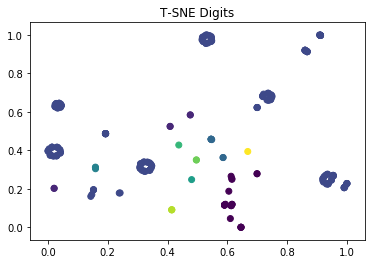

In [146]:
import numpy as np 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 将坐标缩放到[0,1]区间  
def plot_embedding(data):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    return data

def t_sne(n_components,data,label):
    if n_components == 2:
        tsne_digits = TSNE(n_components=n_components, random_state=35).fit_transform(data)
        aim_data = plot_embedding(tsne_digits)
        plt.figure()
        plt.subplot(111)
        plt.scatter(aim_data[:, 0], aim_data[:, 1],c=label)
        plt.title("T-SNE Digits")
        plt.savefig("T-SNE_Digits.png")
    elif n_components == 3:
        tsne_digits = TSNE(n_components=n_components, random_state=35).fit_transform(data)
        aim_data = plot_embedding(tsne_digits)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(aim_data[:, 0], aim_data[:, 1], aim_data[:, 2],c=label)
        plt.title("T-SNE Digits")
        plt.savefig("T-SNE_Digits_3d.png")
    else:
        print("The value of n_components can only be 2 or 3")
 

    plt.show()
    

t_sne(2,weight,ag_cluster_label)